In [1]:
import numpy
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
# Consider two features 
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(numpy.int32)

#### A gradient descent implementation for Logistic Regression 

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin

class GradientDescentLogisticRegression(BaseEstimator, ClassifierMixin):
    """
    A Logistic Regression classifier implementation using
    gradient descent.
    
    Parameters
    ----------
    lr : float, default 0.0001
        The learning rate used for gradient descent.
    seed : int, defeault 0
        The seed used to initialize the random number 
        generator
    verbose : int, defeault 0
        If verbose > 0, then log messages are generated.
    """
    
    def __init__(self, lr=0.0001, seed=0, verbose=0):

        self.lr = lr
        self.seed = seed
        self.verbose = verbose

    def fit(self, X, y, batch_size=None, n_epochs=1000):
        """
        Fits the logistic regression model

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Matrix containing the training samples, 
            where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like of shape (n_samples,1)
            Target vector relative to X.
        batch_size : int or None, default None
            The batch size. If None, then all training
            instances are used to compute the gradient
        n_epochs : int, default 1000
            The number of epochs, i.e., the number
            of passes over the data (gradient descent steps)
        """                
        
        numpy.random.seed(self.seed)
        self.dim = X.shape[1]
        
        # make sure that y is considered to be a column vector
        y = numpy.array(y).reshape((len(y), 1))

        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        X = numpy.concatenate((ones, X), axis=1)
        
        # gradient descent
        self.w = numpy.random.normal(size=self.dim + 1).reshape((-1,1))
        
        for i in range(n_epochs):
            
            grad = self._gradient(X, y, bs=batch_size)

            dw = - self.lr * grad
            self.w = self.w + dw
    
            if self.verbose and (i % (n_epochs // 100) == 0):
            
                loss = self._loss(y, self._predict_proba(X))
                
                print("Training loss: {loss}\tw={w}\t[{progress}%]".format(
                    progress=round(100*((i+1)/n_epochs),2),
                    loss=loss, 
                    w=self.w.flatten())
                )
    
    def predict_proba(self, X):
        """
        Probability estimates.
        
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Matrix containing the instances to be classified, 
            where n_samples is the number of samples and
            n_features is the number of features.
        """
        
        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        X = numpy.concatenate((ones, X), axis=1)    
        
        return self._predict_proba(X)
    
    def predict(self, X):
        """
        Binary classifications (0 or 1)
        
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Matrix containing the instances to be classified, 
            where n_samples is the number of samples and
            n_features is the number of features.
        """        
        preds_proba = self.predict_proba(X)
        preds = (preds_proba >= 0.5).astype(numpy.int32)
        
        return preds    
        
    def _predict_proba(self, X):
        
        wx = numpy.dot(X, self.w)

        return 1.0 / (1 + numpy.exp(-wx)) 
    
    def _loss(self, y, preds):
        
        return - numpy.sum((y * numpy.log(preds) + (1 - y) * numpy.log(1 - preds))) / len(y)

    def _gradient(self, X, y, bs=None):

        # mini-batch 
        if bs is not None:
        
            batch = numpy.random.choice(X.shape[0], bs, replace=False)
            X = X[batch]
            y = y[batch]
        
        diff = self._predict_proba(X) - y
        
        # element-wise product
        prod = diff * X

        grad = (1.0 / len(y)) * prod.sum(axis=0).reshape((-1,1))

        return grad

In [4]:
# define and fit our model
# TASK: Find good values for 'lr', 'n_epochs', 'batch_size'
# (do not change the 'seed' parameter)
model = GradientDescentLogisticRegression(lr=1, verbose=1, seed=0)
model.fit(X, y, batch_size=20, n_epochs=100)

Training loss: 1.88587381845386	w=[ 1.18695694 -1.32800116  0.4893534 ]	[1.0%]
Training loss: 2.4596111997599848	w=[1.4491054  0.45873087 1.11782994]	[2.0%]
Training loss: 2.5835639251528204	w=[ 0.86513569 -1.68547347  0.47261874]	[3.0%]
Training loss: 1.1220062237325938	w=[ 1.10026558 -0.19035532  1.07465482]	[4.0%]
Training loss: 2.6721745931901726	w=[ 0.48079276 -1.7324583   0.62641034]	[5.0%]
Training loss: 2.2347646046909344	w=[0.8185298  0.45565634 1.46236381]	[6.0%]
Training loss: 1.5601493989921962	w=[ 0.18140602 -1.19505203  1.01631873]	[7.0%]
Training loss: 1.8134417281169544	w=[0.38633792 0.32571309 1.60534937]	[8.0%]
Training loss: 3.1877368366954	w=[-0.25911561 -2.00689694  0.93381937]	[9.0%]
Training loss: 1.0167113048573915	w=[ 0.07308775 -0.06778691  1.63959039]	[10.0%]
Training loss: 2.416354741700485	w=[-0.37653281 -1.64999882  1.17187606]	[11.0%]
Training loss: 1.0518929124714962	w=[-0.09269566 -0.03097153  1.78457636]	[12.0%]
Training loss: 1.509090647276109	w=[-0.4

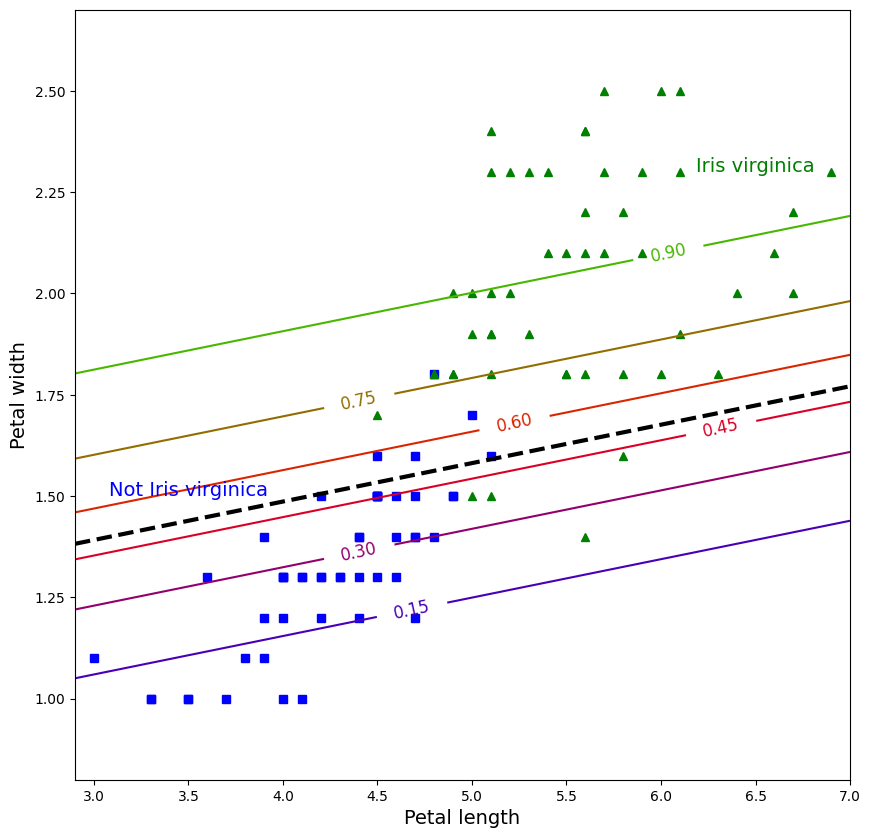

In [5]:
# generate mesh grid of points to visualize the decision surface
x0, x1 = numpy.meshgrid(
        numpy.linspace(2.9, 7, 500).reshape(-1, 1),
        numpy.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = numpy.c_[x0.ravel(), x1.ravel()]
y_proba = model.predict_proba(X_new)

# visualize results
plt.figure(figsize=(10, 10))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
#zz = y_proba[:,1].reshape(x0.shape)
zz = y_proba.reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = numpy.array([2.9, 7])
#boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
boundary = -(model.w[1] * left_right + model.w[0]) / model.w[2]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

#### Comparison with the Logistic Regression implementation of Scikit-Learn

In [6]:
from sklearn.linear_model import LogisticRegression

def loss(y, preds):
        
    return - numpy.sum((y * numpy.log(preds) + (1 - y) * numpy.log(1 - preds))) / len(y)
    
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=0)
log_reg.fit(X, y)

print("Training loss={}".format(loss(y, log_reg.predict_proba(X)[:,1])))
print(log_reg.intercept_)
print(log_reg.coef_)

Training loss=0.06854502701705717
[-45.27248302]
[[ 5.75452052 10.44681114]]


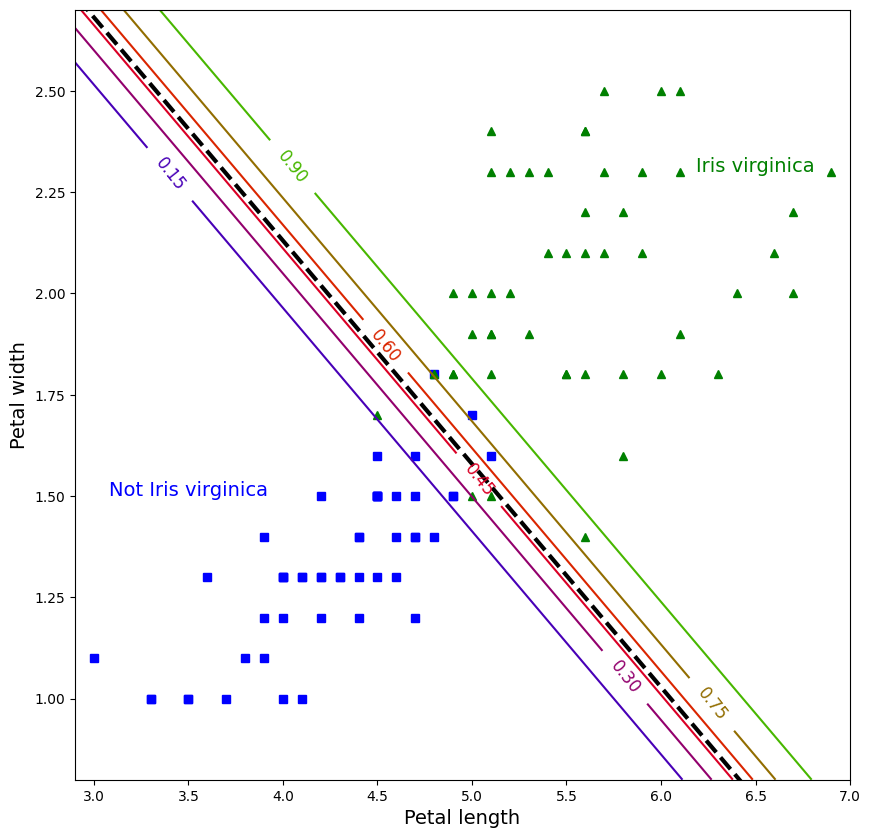

In [7]:
# generate mesh grid of points to visualize the decision surface
x0, x1 = numpy.meshgrid(
        numpy.linspace(2.9, 7, 500).reshape(-1, 1),
        numpy.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = numpy.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

# visualize results
plt.figure(figsize=(10, 10))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:,1].reshape(x0.shape)
#zz = y_proba.reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = numpy.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
#boundary = -(model.w[1] * left_right + model.w[0]) / model.w[2]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()